In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/poultry_weight_15_08_2023.csv')
df

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated
0,2021-02-10,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,3,0.101,1,19600
1,2021-02-13,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,6,0.176,1,19600
2,2021-02-20,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,13,0.454,1,19600
3,2021-02-27,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,20,0.879,1,19600
4,2021-03-06,071c638d-bb9b-4e68-a5d1-416da57d887f,00d4000a-3f47-4d84-bed5-8ca59da0316e,04ef96f7-f110-469d-a685-2f45708ae94b,27,1.451,1,19600
...,...,...,...,...,...,...,...,...
131650,2022-05-13,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,14,0.330,1,30400
131651,2022-05-27,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,28,1.300,1,30400
131652,2022-05-30,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,31,1.550,1,30400
131653,2022-06-02,fd3d63ce-5a3f-44a0-b718-8887eaedc5a0,02d272f2-8802-4c36-89d1-3c323e2fcf2b,6111303a-4640-4a4b-aa46-bde9015c41ff,34,1.840,1,30400


In [39]:
# contar quantos animal_goups_uuid unicos existem
df['animal_group_uuid'].nunique()

18960

In [40]:
# contar valores totais de animal_group_uuid
df['animal_group_uuid'].count()

131655

In [10]:
# saber quantas entradas existem para cada animal_group_uuid
df['animal_group_uuid'].value_counts()

animal_group_uuid
2d77372e-4dc0-421a-a756-afbc91b4b0fa    47
cf78def5-0ec1-49dc-bdb7-e7ba619b8928    46
ebde6019-086f-4eda-b52b-a985da58a8d6    45
3150a71c-f713-46b7-88f1-5ab72ffad7a9    44
20f0ba42-da77-4e47-91af-4fe547ca1bc1    44
                                        ..
34950790-f47f-4807-8875-921afa273e2e     1
a02144b1-4849-4d66-a301-e7f52a591f6a     1
223d6766-b79f-4f84-933c-0d3257b9af5c     1
6e5d0b35-a418-46dc-8416-86b058248108     1
f3fc8f1a-0b43-46aa-84e7-5a05fa4f7ef6     1
Name: count, Length: 18960, dtype: int64

In [5]:
# Salvar em novo dataframe apenas os animais que possuem uma quantidade maios que o numero 30 em numeor de repetição
df_animal_group_uuid = df['animal_group_uuid'].value_counts()
df_animal_group_uuid = df_animal_group_uuid[df_animal_group_uuid > 29]
df_animal_group_uuid = df_animal_group_uuid.reset_index()
df_animal_group_uuid.columns = ['animal_group_uuid', 'count']
df_animal_group_uuid

,animal_group_uuid,count
0,2d77372e-4dc0-421a-a756-afbc91b4b0fa,47
1,cf78def5-0ec1-49dc-bdb7-e7ba619b8928,46
2,ebde6019-086f-4eda-b52b-a985da58a8d6,45
3,3150a71c-f713-46b7-88f1-5ab72ffad7a9,44
4,20f0ba42-da77-4e47-91af-4fe547ca1bc1,44
...,...,...
69,6eadec84-877f-418c-9a74-d3f176215ab9,31
70,10a72f4a-d588-4d98-8004-e9f8bf095a0c,31
71,985759fb-6846-465a-99c4-5b57aa21fb2c,30
72,a98c7344-5d26-4043-9a21-d7ccc081b4e4,30


<Axes: xlabel='animal_group_uuid'>

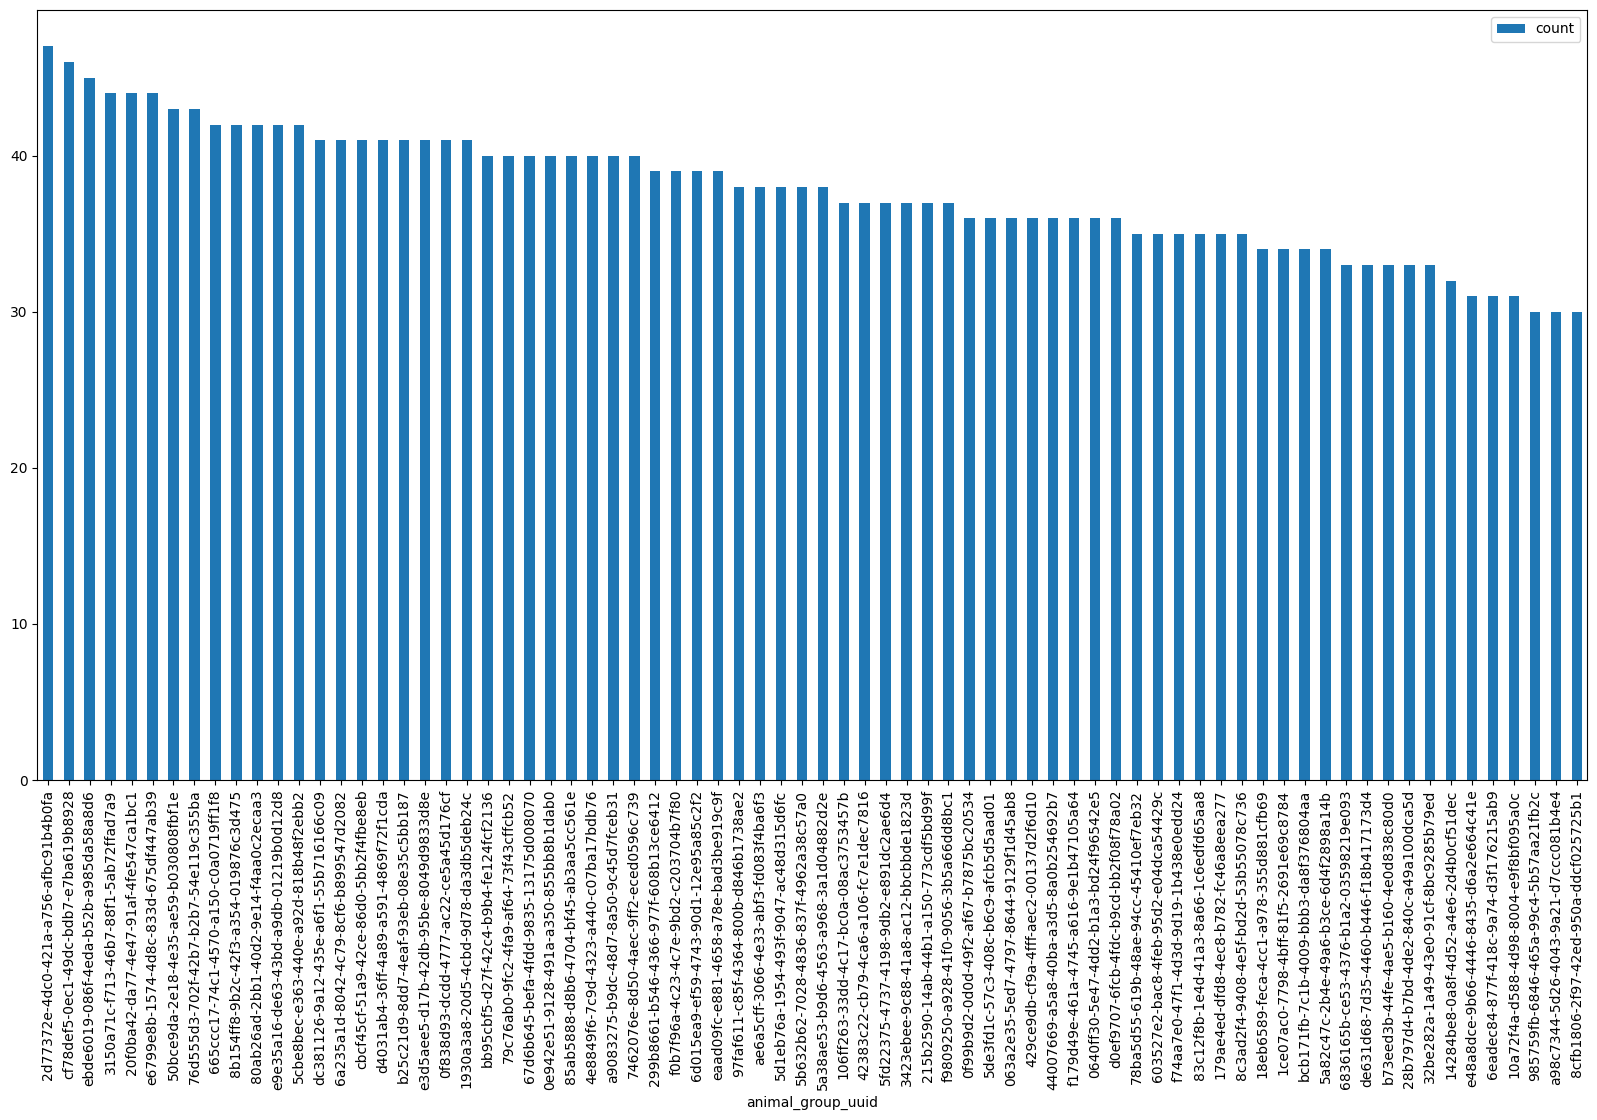

In [7]:
# plotar um grafico de barras com os valores de animal_group_uuid e sua repetiçoes e nao mostrar o id do animal_group_uuid
df_animal_group_uuid.plot.bar(x='animal_group_uuid', y='count', figsize=(20, 10))

In [8]:
# selecionar todas as datas de um animal_group_uuid especifico
df_lote = df[df['animal_group_uuid'] == '8cfb1806-2f97-42ed-950a-ddcf025725b1']
df_lote.head()

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated
128936,2022-11-10,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,7,0.197,1,23000
128937,2022-11-11,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,8,0.251,1,23000
128938,2022-11-12,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,9,0.276,1,23000
128939,2022-11-13,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,10,0.309,1,23000
128940,2022-11-14,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,60bad4d6-9ba6-45e2-9104-3d156855a7c6,8cfb1806-2f97-42ed-950a-ddcf025725b1,11,0.355,1,23000


In [9]:
df_lote = df[df['animal_group_uuid'] == '32be282a-1a49-43e0-91cf-8bc9285b79ed']
df_lote.head()

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated
130551,2022-09-15,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,baa9f1ac-6d5f-4055-86cc-cb1c6bd1380b,32be282a-1a49-43e0-91cf-8bc9285b79ed,7,0.156,1,30500
130552,2022-09-22,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,baa9f1ac-6d5f-4055-86cc-cb1c6bd1380b,32be282a-1a49-43e0-91cf-8bc9285b79ed,14,0.400,1,30500
130553,2022-09-24,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,baa9f1ac-6d5f-4055-86cc-cb1c6bd1380b,32be282a-1a49-43e0-91cf-8bc9285b79ed,16,0.513,1,30500
130554,2022-09-25,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,baa9f1ac-6d5f-4055-86cc-cb1c6bd1380b,32be282a-1a49-43e0-91cf-8bc9285b79ed,17,0.572,1,30500
130555,2022-09-26,f5a43e25-f33a-4c91-be46-ea1ac4c6823b,baa9f1ac-6d5f-4055-86cc-cb1c6bd1380b,32be282a-1a49-43e0-91cf-8bc9285b79ed,18,0.608,1,30500


In [12]:
# Suponhamos que 'data' seja o seu DataFrame com os dados
# Certifique-se de que 'reference_date' seja um objeto datetime

# Ordenar o DataFrame por 'farm_uuid', 'animal_group_uuid' e 'reference_date'
df.sort_values(by=['farm_uuid', 'animal_group_uuid', 'reference_date'], inplace=True)

# Calcular a diferença de idade entre as entradas de pesagem
# df.groupby(['farm_uuid', 'animal_group_uuid']) Cria a combinação unica de farm_uuid e animal_group_uuid
# ['animal_group_age'].diff() calcula a diferença de idade pra cada grupo
df['diff_age'] = df.groupby(['farm_uuid', 'animal_group_uuid'])['animal_group_age'].diff()

# Verificar se a diferença de idade é sempre igual a 1
lotes_variacao_1_dia = df[df['diff_age'] == 1]['animal_group_uuid'].nunique()

print(f"Número de lotes com variação de 1 em 1 dia: {lotes_variacao_1_dia}")


Número de lotes com variação de 1 em 1 dia: 234


In [13]:
df['diff_age']

90717    NaN
90718    7.0
90719    7.0
90720    7.0
90721    7.0
        ... 
90712    7.0
90713    7.0
90714    7.0
90715    7.0
90716    7.0
Name: diff_age, Length: 131655, dtype: float64

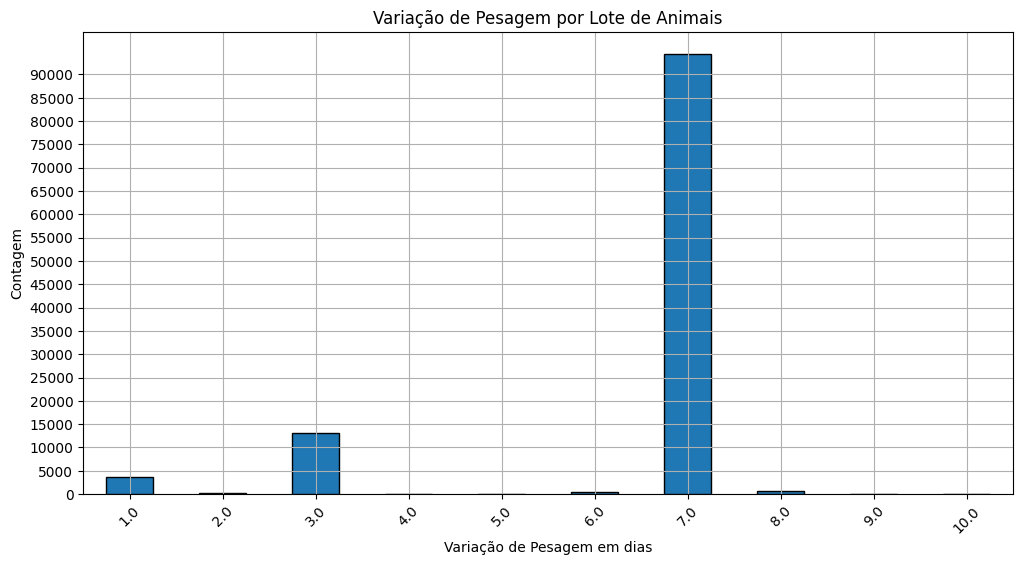

In [14]:
df_filtered = df[(df['diff_age'] >= 1) & (df['diff_age'] <= 10)]

# Criar um histograma das variações de idade por lote de animais
plt.figure(figsize=(12, 6))

#  df_filtered['diff_age'].value_counts() conta quantas vezes cada valor aparece, no caso diff_age
#  sort_index() ordem crescente dos valores do index
#  plot(kind='bar') cria um grafico de barras   
#  edgecolor='k' cria uma borda preta em volta das barras
ax = df_filtered['diff_age'].value_counts().sort_index().plot(kind='bar', edgecolor='k')

# Definir os rótulos (ticks) do eixo x , y e titulo
plt.xlabel('Variação de Pesagem em dias')
plt.ylabel('Contagem')
plt.title('Variação de Pesagem por Lote de Animais')

# Definir os rótulos (ticks) do eixo y para mostrar de 5k em 5k
# np.arange(0, df_filtered['diff_age'].value_counts().max() + 1, 5000) gera uma sequência de números 
# começando em 0, indo até o valor máximo da contagem de variação de idade em incrementos de 5000. 
# Isso é usado para definir os rótulos no eixo y.

y_ticks = np.arange(0, df_filtered['diff_age'].value_counts().max() + 1, 5000)
ax.set_yticks(y_ticks)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
df

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.000,28300,27913,NaN
90718,2019-02-03,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,14,11886.000,28300,27913,7.0
90719,2019-02-10,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,21,26319.000,28300,27913,7.0
90720,2019-02-17,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,28,41884.000,28300,27913,7.0
90721,2019-02-24,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,35,61694.000,28300,27913,7.0
...,...,...,...,...,...,...,...,...,...
90712,2022-04-26,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,13,0.520,1,19989,7.0
90713,2022-05-03,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,20,1.040,1,19989,7.0
90714,2022-05-10,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,27,1.728,1,19989,7.0
90715,2022-05-17,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,34,2.511,1,19989,7.0


In [30]:
duplicata = df[df.duplicated(subset=['animal_group_uuid', 'diff_age'], keep=False)]
selecao = df[~df.index.isin(duplicata.index)]
selecao

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90717,2019-01-27,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,0b313f33-b1e9-4621-b92f-d679afae423c,7,5377.000,28300,27913,NaN
90724,2020-10-07,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1cf8462c-683a-4639-8782-4e6a97aa5ae4,7,12555.595,27951,27900,NaN
90730,2018-01-23,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,7,5415.000,28500,28176,NaN
90736,2018-03-06,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,50,76950.000,28500,28176,8.0
90737,2020-12-10,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,271fcf50-c69f-4f35-a78b-c5a34ed6b5cc,7,5058.000,28100,28100,NaN
...,...,...,...,...,...,...,...,...,...
90700,2021-06-07,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd26e781-6452-4d5a-806d-661053c97fb1,28,1.479,1,21000,14.0
90703,2022-02-16,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,3,0.114,1,19993,NaN
90704,2022-02-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,6,0.182,1,19993,3.0
90710,2022-04-16,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,ffb49663-f676-4f31-9f9c-00c9e6e939ca,3,0.112,1,19989,NaN


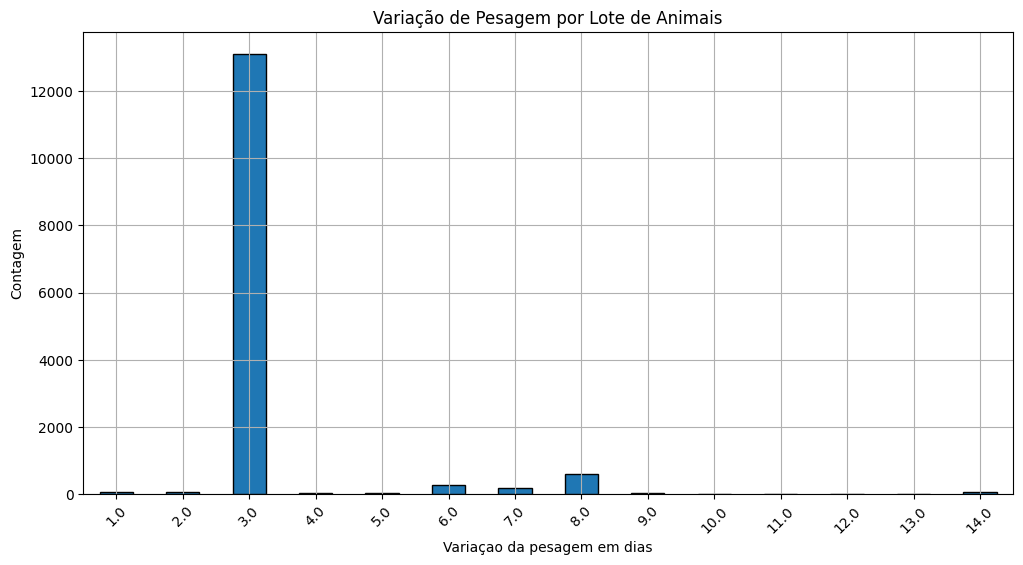

In [34]:
selecao = selecao[(selecao['diff_age'] >= 1) & (selecao['diff_age'] <= 14)]
plt.figure(figsize=(12,6))
graf = selecao['diff_age'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.xlabel('Variaçao da pesagem em dias')
plt.ylabel('Contagem')
plt.title('Variação de Pesagem por Lote de Animais')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [35]:
selecao

,reference_date,holding_uuid,farm_uuid,animal_group_uuid,animal_group_age,total_measurement_weight,total_animal_measurement,balance_animals_stock_accumulated,diff_age
90736,2018-03-06,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,1e6e69e8-ea75-4a84-b374-3eb3d7f2e309,50,76950.000,28500,28176,8.0
90757,2018-05-07,b34b351a-b658-495d-9139-b9edd6c3f6dc,0004c280-2aac-4f34-a378-3ceffc23584a,4b953b26-4af2-4248-ac2c-7aeb997c5e1f,49,90440.000,28000,27756,8.0
90853,2019-12-14,b34b351a-b658-495d-9139-b9edd6c3f6dc,00050672-9d78-49e5-9eab-4434dac6e2e5,2451c043-90c5-4cea-98c6-04cdb2cb4897,50,92300.000,26000,25495,8.0
90860,2018-09-05,b34b351a-b658-495d-9139-b9edd6c3f6dc,00050672-9d78-49e5-9eab-4434dac6e2e5,5368583d-8697-441f-b3ba-2fdd397d0032,49,95700.000,29000,28470,8.0
90913,2019-07-24,b34b351a-b658-495d-9139-b9edd6c3f6dc,00050672-9d78-49e5-9eab-4434dac6e2e5,d86dca49-5dca-46ce-a9b9-8c936999c944,49,97580.000,28700,27890,8.0
...,...,...,...,...,...,...,...,...,...
90691,2022-08-13,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd220ead-85ec-4cce-875f-05dfe4ebe0ef,6,0.192,1,21894,3.0
90698,2021-05-17,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd26e781-6452-4d5a-806d-661053c97fb1,7,0.166,1,21000,3.0
90700,2021-06-07,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd26e781-6452-4d5a-806d-661053c97fb1,28,1.479,1,21000,14.0
90704,2022-02-19,071c638d-bb9b-4e68-a5d1-416da57d887f,fffa74b7-6607-4b65-abbe-007654f88751,fd34d9fd-6236-401a-9d86-64356722dab8,6,0.182,1,19993,3.0
